# Credit Card Fraud Detection

## 1 - Exploratory Data Analysis (EDA)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/mohanraj-official/Datasets/refs/heads/main/credit_card_transactions.csv")
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [36]:
df.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,No


In [37]:
df = df.drop(columns = "Transaction_DateTime", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Location                   5000 non-null   object 
 5   Region                     5000 non-null   object 
 6   Cardholder_Age             4865 non-null   float64
 7   Cardholder_Gender          4911 non-null   object 
 8   Cardholder_Monthly_Income  4686 non-null   float64
 9   Cardholder_Average_Spend   4792 non-null   float64
 10  Credit_Limit               4991 non-null   float64
 11  Device_Type                4960 non-null   object 
 12  Day_of_Week                5000 non-null   object 
 13  Is_Fraudulent              5000 non-null   objec

In [38]:
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


### a - Distribution of Catgarical features

In [39]:
cat_columns = df.select_dtypes(include = "O").columns
num_columns = df.select_dtypes(include = "number").columns
print(list(num_columns))
print(list(cat_columns))

['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']
['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']


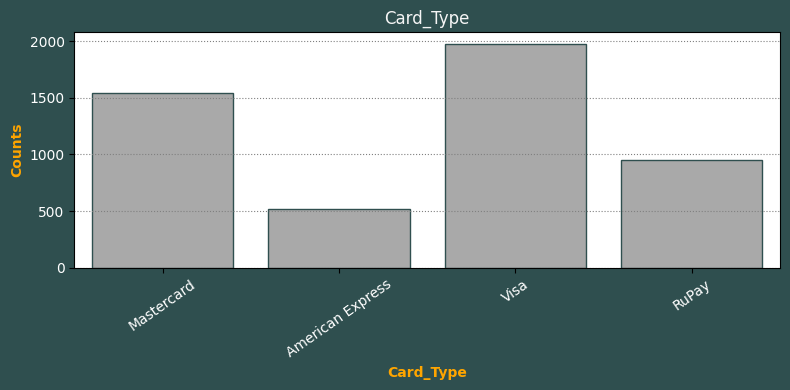

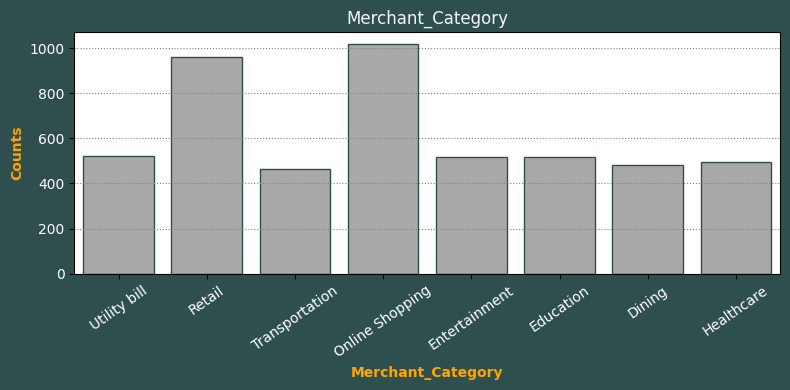

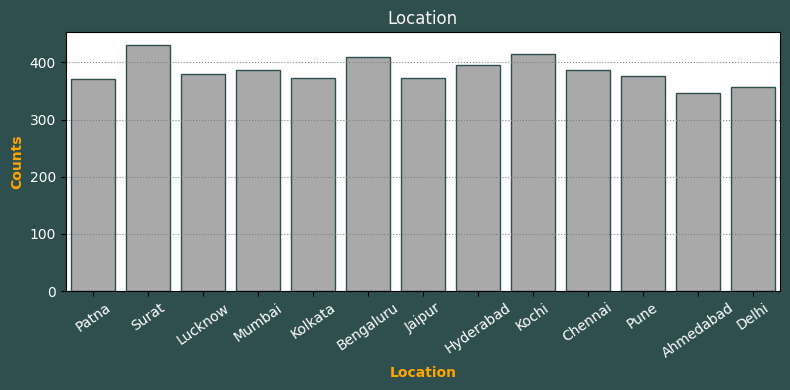

In [40]:
cols = ["Card_Type", "Merchant_Category", "Location"]
for i in cols:
  plt.figure(figsize = (8, 4), facecolor = "darkslategray", edgecolor = "white")
  sns.countplot(data = df, x = i, facecolor = "darkgray", edgecolor = "darkslategray")
  plt.title(f"{i}", color = "whitesmoke")
  plt.xticks(color = "white", rotation = 35)
  plt.yticks(color = "white")
  plt.xlabel(i, color = "orange", fontweight = "bold")
  plt.ylabel("Counts", color = "orange", fontweight = "bold")
  plt.tight_layout()
  plt.grid(color = "gray", axis = "y", visible = True, linestyle = "dotted")
  plt.show()
  print("\n")

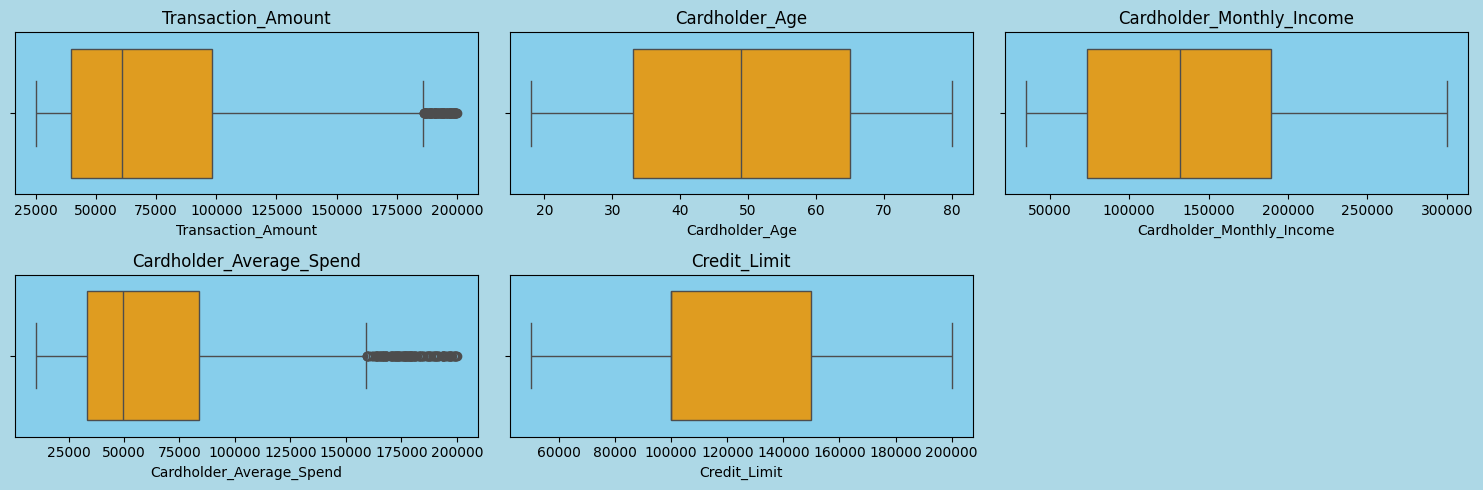

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5), facecolor = "lightblue")
for i, j in enumerate(num_columns, 1):
  plt.subplot(2, 3, i)
  vis2 = sns.boxplot(data = df, x = j, color = "orange")
  vis2.set_facecolor("skyblue")
  plt.title(f"{j}")
plt.tight_layout()
plt.show()

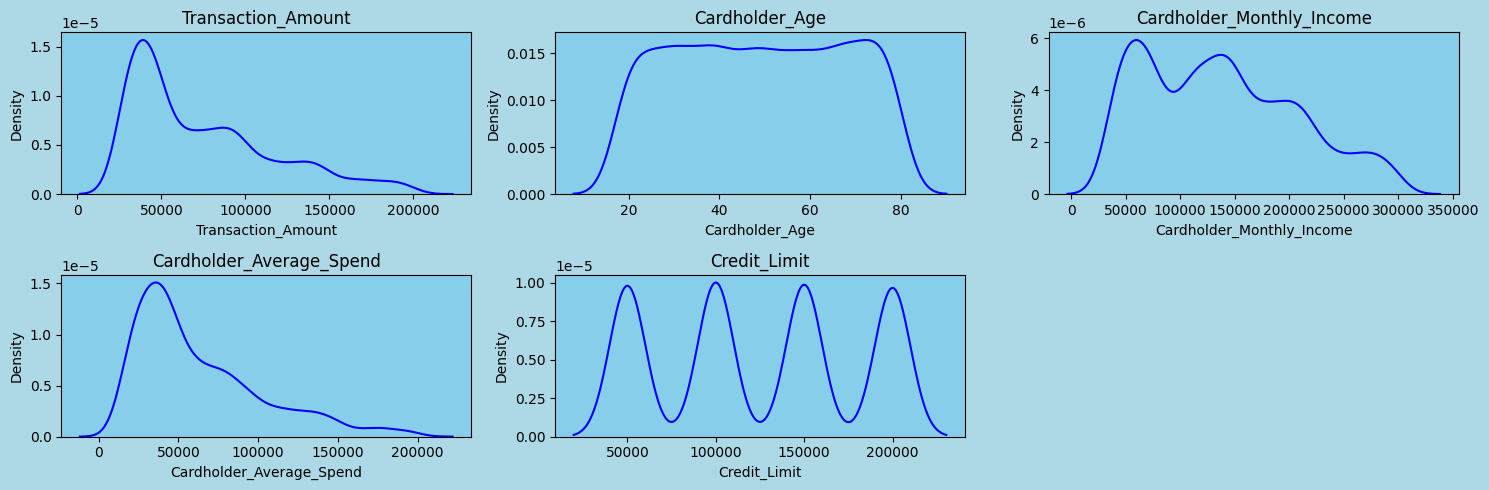

In [42]:
plt.figure(figsize = (15, 5), facecolor = "lightblue")
for i, j in enumerate(num_columns, 1):
  plt.subplot(2, 3, i)
  vis = sns.kdeplot(data = df, x = j, color = "blue")
  vis.set_facecolor("skyblue")
  plt.title(f"{j}")
plt.tight_layout()
plt.show()

In [43]:
outlier_columns = ["Transaction_Amount", "Cardholder_Average_Spend"]
for i in outlier_columns:
  print(f"{i}\n")
  print(f"Median Value\t:", df[i].median())
  print(f"Minimum Value\t:",df[i].mean())
  print(f"Mode Value\t:",df[i].mode()[0])
  print(f"25th Percentile\t:", df[i].quantile(0.25))
  print(f"75th Percentile\t:", df[i].quantile(0.75))
  print(f"maximum Value\t:", df[i].max())
  print(f"Standard Deviation:", df[i].std(), "\n\n")

Transaction_Amount

Median Value	: 60922.0
Minimum Value	: 74667.99599519423
Mode Value	: 25207.0
25th Percentile	: 39742.5
75th Percentile	: 98373.5
maximum Value	: 199923.0
Standard Deviation: 43089.04562312538 


Cardholder_Average_Spend

Median Value	: 49547.945
Minimum Value	: 63058.3435663606
Mode Value	: 51885.56
25th Percentile	: 33336.7425
75th Percentile	: 83732.3525
maximum Value	: 199898.29
Standard Deviation: 40056.989703958934 




### C - Bivariate and Multivariate Analysis

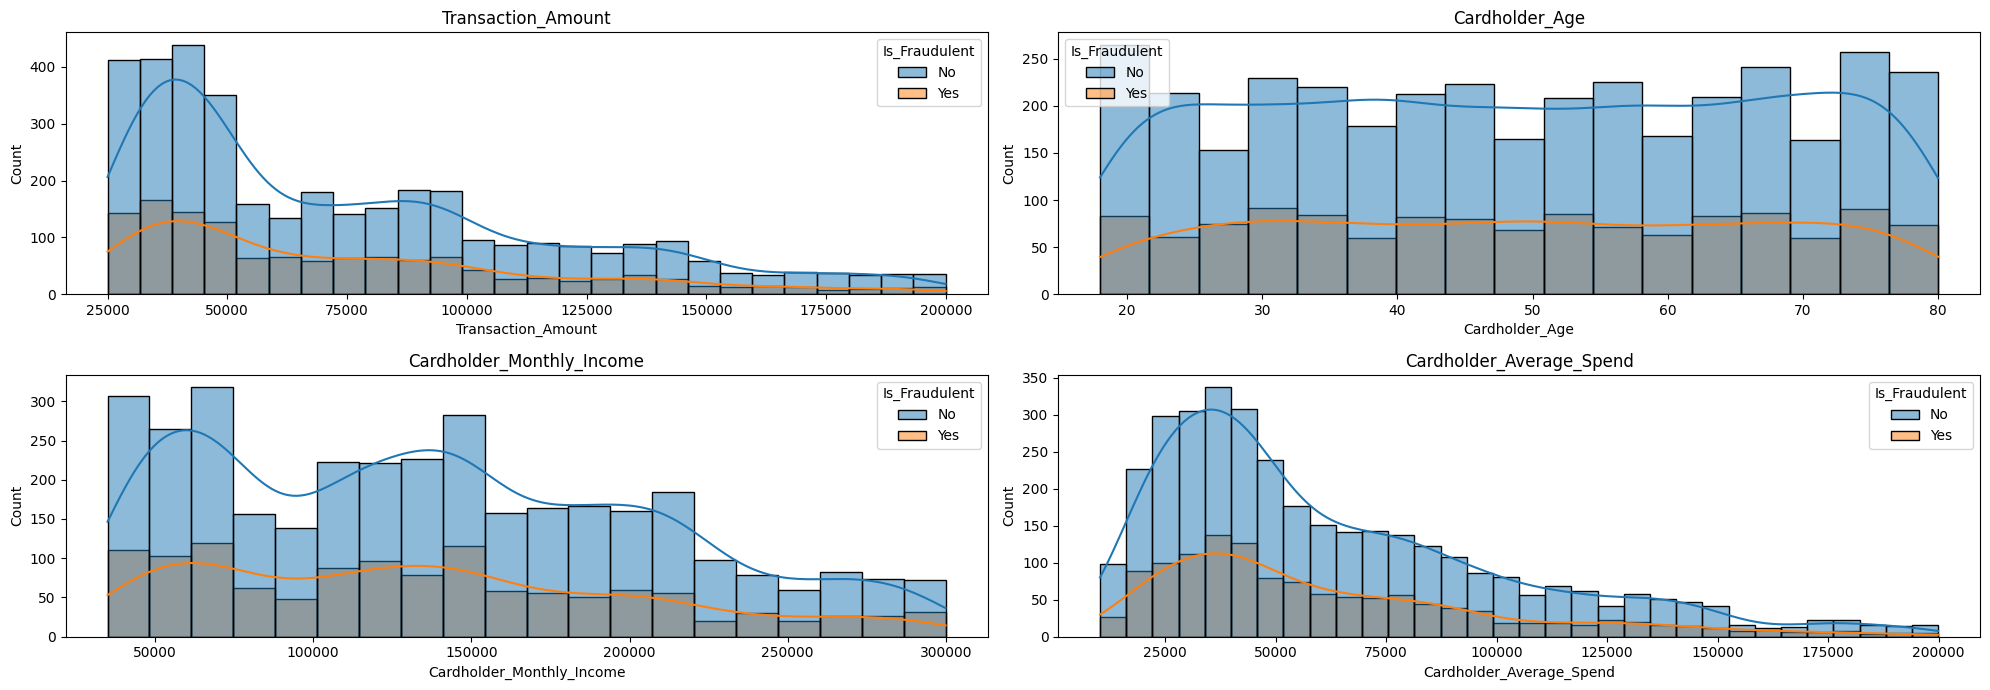

In [44]:
plt.figure(figsize = (20, 7))
for i, j in enumerate(num_columns[:-1], 1):
  plt.subplot(2, 2, i)
  sns.histplot(data = df, x = j, kde = True, hue = "Is_Fraudulent", color = "green")
  plt.title(j)
plt.tight_layout()
plt.show()

### d - transaction Amount trends based is Fraudulent or not

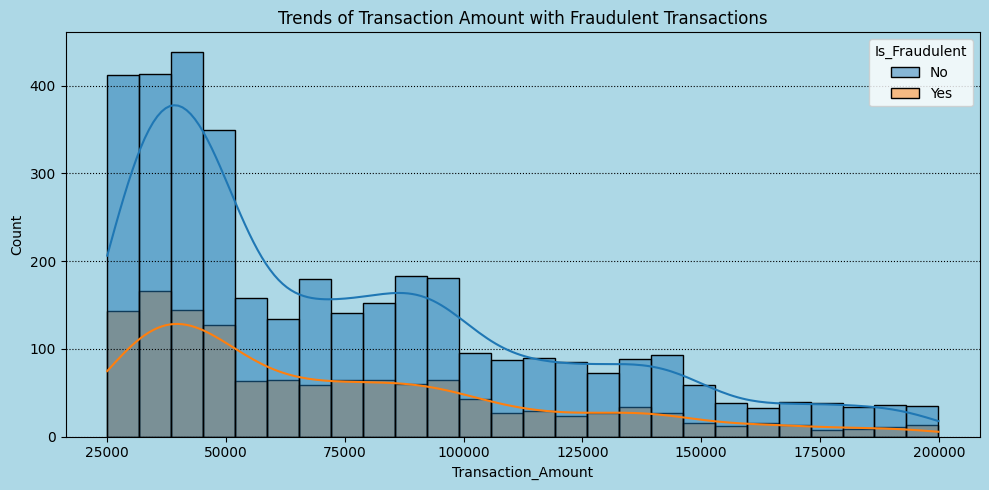

In [45]:
plt.figure(figsize = (10, 5), facecolor = "lightblue", edgecolor = "black")
bg = sns.histplot(data = df, x = "Transaction_Amount", hue = "Is_Fraudulent", color = "darkgreen", kde = True)
bg.set_facecolor("lightblue")
plt.title("Trends of Transaction Amount with Fraudulent Transactions")
plt.grid(color = "black", linestyle = "dotted", axis = "y", visible = True)
plt.tight_layout()
plt.show()

### e - Suspectable features

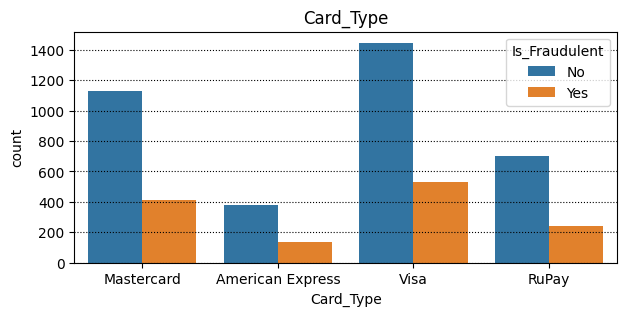

In [46]:
plt.figure(figsize = (7, 3))
sns.countplot(data = df, x= "Card_Type", hue = "Is_Fraudulent")
plt.title("Card_Type")
plt.grid(color = "black", linestyle = "dotted", axis = "y")
plt.show()

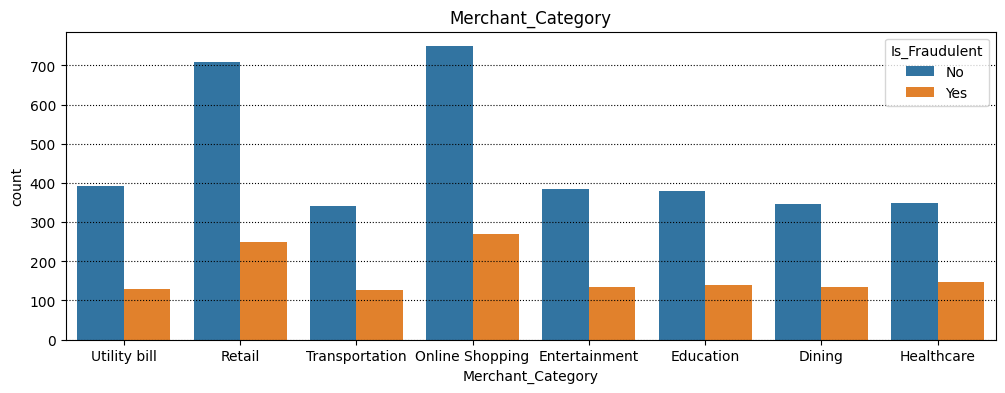

In [47]:
plt.figure(figsize = (12, 4))
sns.countplot(data = df, x= "Merchant_Category", hue = "Is_Fraudulent")
plt.title("Merchant_Category")
plt.grid(color = "black", linestyle = "dotted", axis = "y")
plt.show()

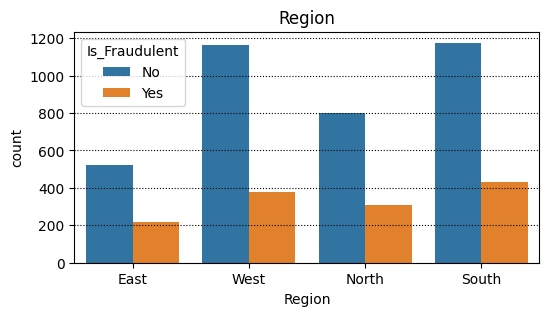

In [48]:
plt.figure(figsize = (6, 3))
sns.countplot(data = df, x= "Region", hue = "Is_Fraudulent")
plt.title("Region")
plt.grid(color = "black", linestyle = "dotted", axis = "y")
plt.show()

## 2 - Data Preprocessing - Data Cleaning:

### a - Imputation for missing values

In [49]:
for i in cat_columns:
  df[i] = df[i].fillna(df[i].mode()[0])

for i in num_columns:
  df[i] = df[i].fillna(df[i].mean())

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  5000 non-null   object 
 2   Merchant_Category          5000 non-null   object 
 3   Transaction_Amount         5000 non-null   float64
 4   Location                   5000 non-null   object 
 5   Region                     5000 non-null   object 
 6   Cardholder_Age             5000 non-null   float64
 7   Cardholder_Gender          5000 non-null   object 
 8   Cardholder_Monthly_Income  5000 non-null   float64
 9   Cardholder_Average_Spend   5000 non-null   float64
 10  Credit_Limit               5000 non-null   float64
 11  Device_Type                5000 non-null   object 
 12  Day_of_Week                5000 non-null   object 
 13  Is_Fraudulent              5000 non-null   objec

In [51]:
#handling Outliers
for i in num_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  lower_bound = Q1 - IQR*1.5
  upper_bound = Q3 + IQR*1.5

  df = df[(df[i]> lower_bound) & (df[i]< upper_bound)]

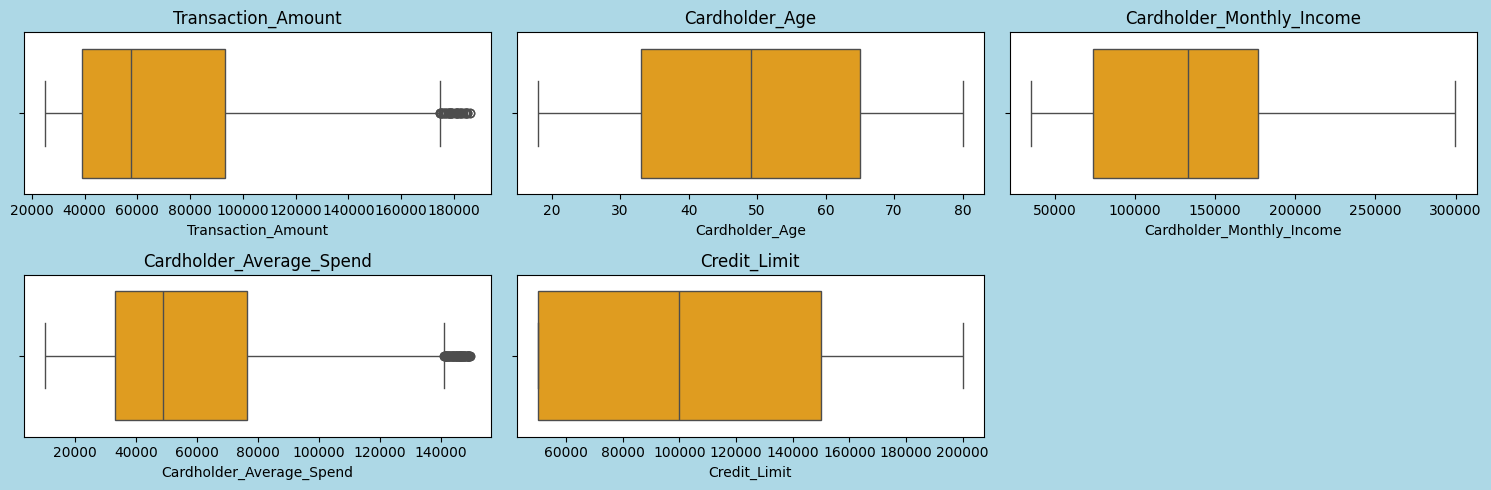

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 5), facecolor = "lightblue")
for i, j in enumerate(num_columns, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(data = df, x = j, color = "orange")
  plt.title(f"{j}")
plt.tight_layout()
plt.show()

### c - Access Skewness

In [53]:
for i in num_columns:
  print(f"{i:<27}:",df[i].skew())

Transaction_Amount         : 0.9343163226542156
Cardholder_Age             : -0.0106893400249129
Cardholder_Monthly_Income  : 0.4948589278186003
Cardholder_Average_Spend   : 0.8996510282876518
Credit_Limit               : 0.091206794461929


In [54]:
import numpy as np
for i in num_columns:
  df[i] = df[i].apply(np.sqrt)
df["Cardholder_Age"] = df["Cardholder_Age"]**2

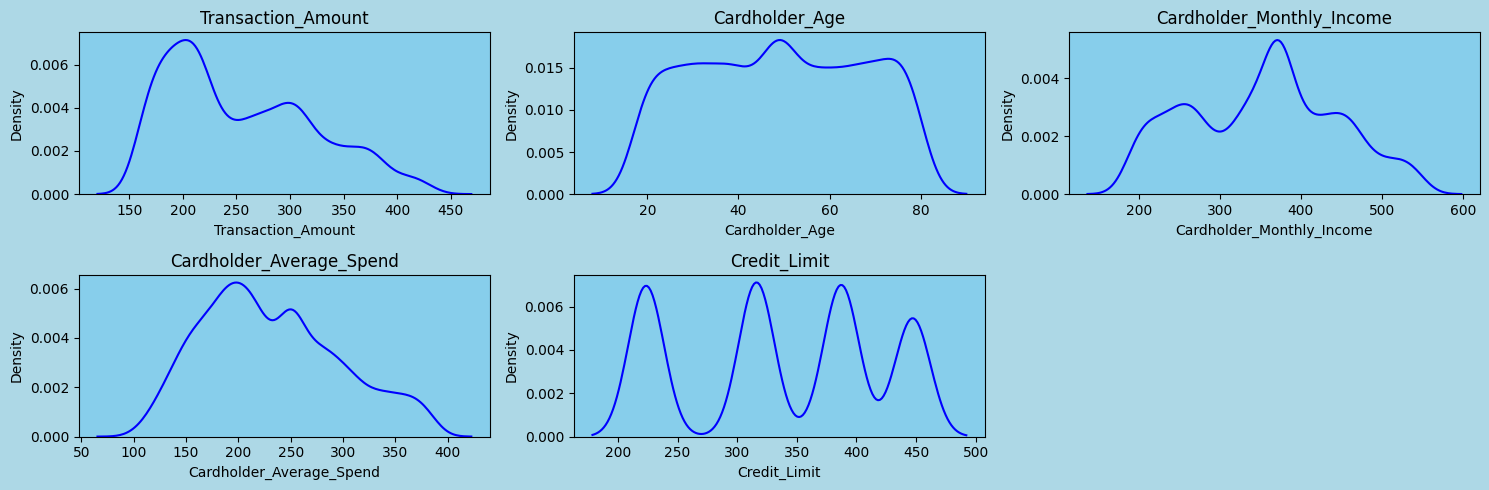

In [55]:
plt.figure(figsize = (15, 5), facecolor = "lightblue")
for i, j in enumerate(num_columns, 1):
  plt.subplot(2, 3, i)
  vis3 = sns.kdeplot(data = df, x = j, color = "blue")
  vis3.set_facecolor("skyblue")
  plt.title(f"{j}")
plt.tight_layout()
plt.show()

## 3 - Feature Engineering:

### a - Identify the categarical features

In [56]:
print(list(cat_columns))

['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']


In [57]:
df.drop(columns = "Transaction_ID")
for i in cat_columns:
  print(df[i].unique())
  print()

['W963UK57' 'V606KV56' 'K256ZN73' ... 'S458OS59' 'E863PD98' 'D501WH15']

['Mastercard' 'American Express' 'RuPay' 'Visa']

['Utility bill' 'Retail' 'Entertainment' 'Online Shopping' 'Education'
 'Dining' 'Transportation' 'Healthcare']

['Patna' 'Surat' 'Lucknow' 'Mumbai' 'Kolkata' 'Bengaluru' 'Jaipur'
 'Hyderabad' 'Kochi' 'Chennai' 'Pune' 'Ahmedabad' 'Delhi']

['East' 'West' 'North' 'South']

['Female' 'Male']

['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device']

['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']

['No' 'Yes']



### b - Encode the categary columns to numeric

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_columns[1:]:
  df[i] = le.fit_transform(df[i])

In [59]:
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,1,7,164.966663,10,0,23.0,0,307.623146,190.708285,316.227766,4,6,0
1,V606KV56,0,5,289.751618,12,3,49.0,1,384.861014,298.628733,387.298335,1,0,0
4,K256ZN73,2,5,284.903492,8,1,37.0,0,417.696062,229.593314,447.213595,2,2,0
5,I812SG19,2,2,363.205176,9,3,80.0,1,408.253598,283.537370,387.298335,3,2,0
6,Y182UO40,3,5,372.875314,12,3,33.0,1,414.717976,290.199483,387.298335,1,3,1


## 4 - Feature Selection:

### a - Relevent Features

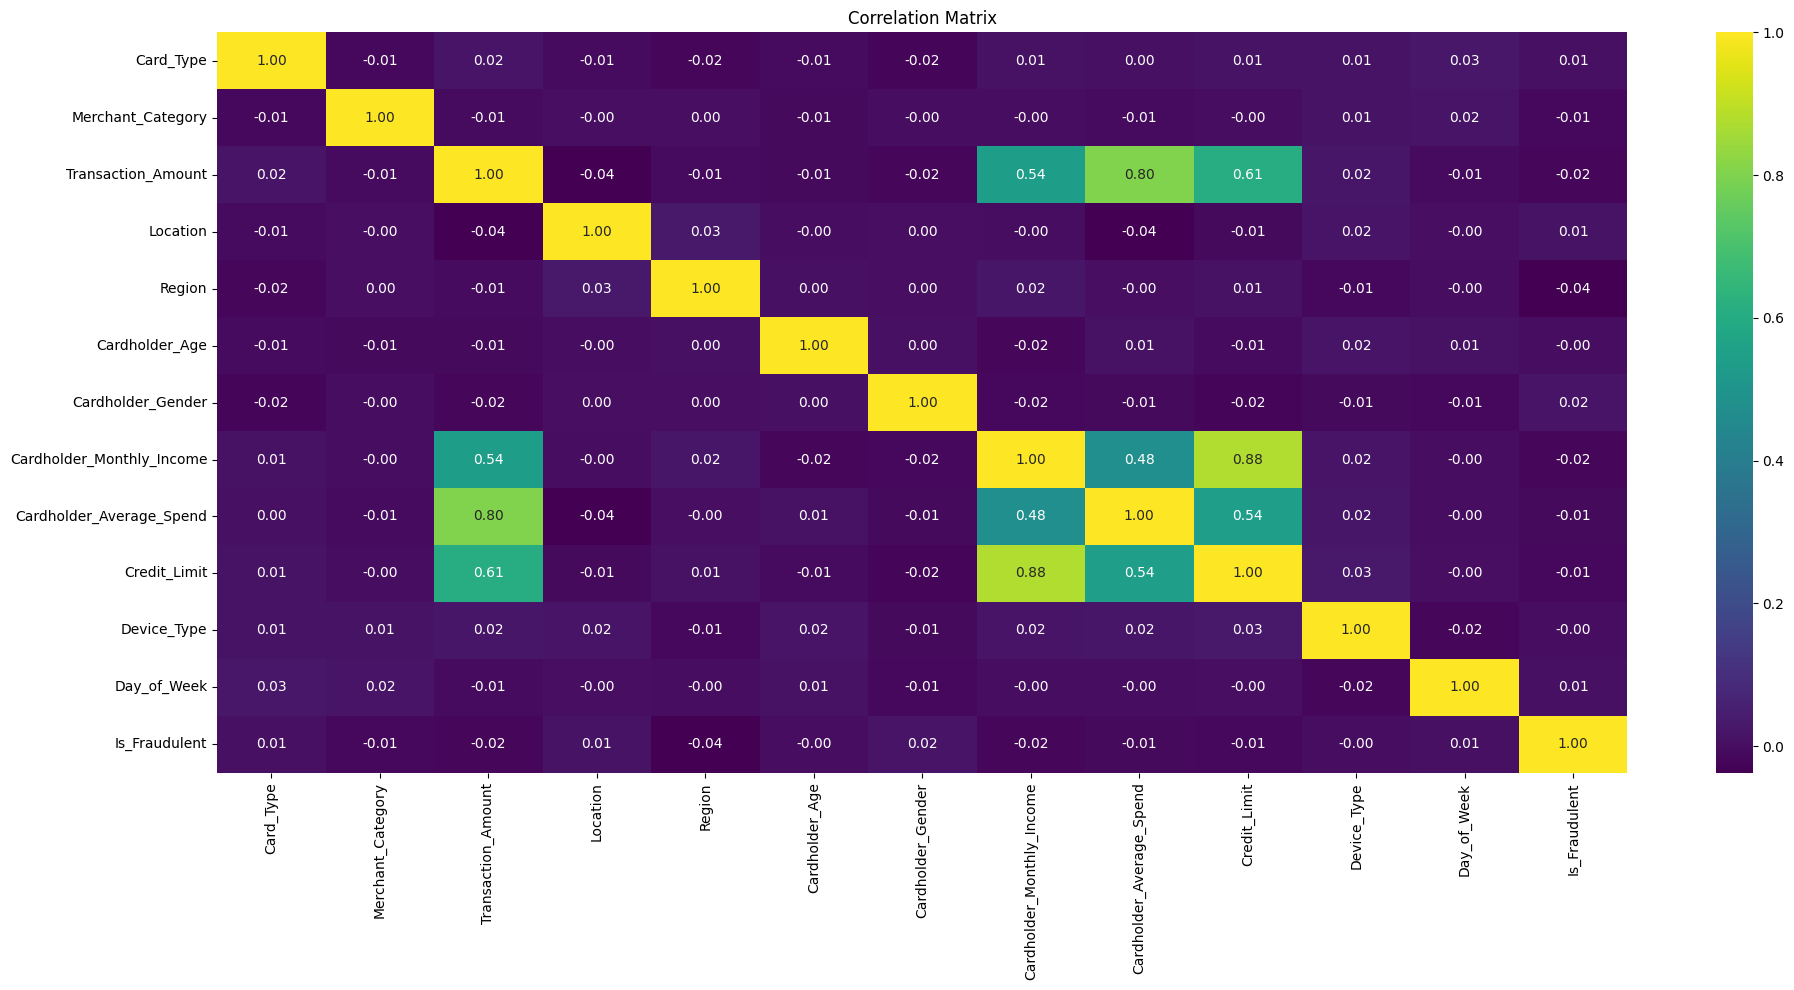

In [60]:
plt.figure(figsize = (20, 10))
plt.title("Correlation Matrix")
sns.heatmap(df.drop(columns = ["Transaction_ID"]).corr(), annot = True, fmt = ".2f", cmap = "viridis")
plt.tight_layout()
plt.show()

In [61]:
selected_features = ["Transaction_Amount", "Cardholder_Average_Spend", "Cardholder_Monthly_Income", "Credit_Limit"]

### b - Remove Irrelevent Features

In [62]:
df.drop(columns = ["Transaction_ID", "Is_Fraudulent"])
X = df[selected_features]
y = df["Is_Fraudulent"]

## 5 - Train Test Split

### a - Split the Data

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(f"X_train Shape \t: {X_train.shape}")
print(f"X_test Shape \t: {X_test.shape}")
print(f"y_train Shape \t: {y_train.shape}")
print(f"y_test Shape \t: {y_test.shape}")

X_train Shape 	: (3796, 4)
X_test Shape 	: (950, 4)
y_train Shape 	: (3796,)
y_test Shape 	: (950,)


In [64]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# print(f"X_train Shape \t: {X_train.shape}")
# print(f"X_test Shape \t: {X_test.shape}")
# print(f"y_train Shape \t: {y_train.shape}")
# print(f"y_test Shape \t: {y_test.shape}")

## 6 - Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## 7 - Machine Learning Model

### a - machine learning libraries

In [66]:
# Required Features
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [67]:
classifiers = {
    "Logistic Regression" : LogisticRegression(C=1.0, max_iter=100),
    "Gaussian NB" : GaussianNB(),
    "Decision Tree Classifier" : DecisionTreeClassifier(max_depth = 5, min_samples_split = 2),
    "Random Forest Classifier" : RandomForestClassifier(max_depth = 10, n_estimators = 5, min_samples_split = 2),
    "KNeighbors Clssifiers" : KNeighborsClassifier(n_neighbors = 5),
    "SVC" : SVC(probability = True, C = 1.0)
}

results = []

for name, model in classifiers.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  precision = precision_score(y_pred, y_test, average = "weighted", zero_division = 1)
  recall  = recall_score(y_pred, y_test, average = "weighted", zero_division = 1)
  cm = confusion_matrix(y_test, y_pred)

  cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
  results.append({"Model" : name, "Accuracy Score" : acc_score, "F1 Score" : f1, "Precision Score" : precision, "recall" : recall, "Confusion Matrix" : cm, "cv_score" : cv_score})

df_results = pd.DataFrame(results)

### Logistic Regression, Gaussian Naive Bayes, Decision Tree Classifier, Random Forest Classifiers are having High Accuracy Score. **Almost(73%)**

# **Credit Card Fraud Detection**

## **Dataset Overview**
- **Rows:** 5000  
- **Columns:** 13  
  - **Numerical Columns:** 5  
  - **Categorical Columns:** 7  

---

## **Key Insights**

### **1. Most Used Card Types:**
- **MasterCard** and **Visa** are the most commonly used card types.

### **2. Most Common Merchant Categories:**
- **Online Shopping** and **Retail** are the most frequently used merchant categories.

### **3. Fraudulent Transactions Insights:**
- **Transaction Amount:** Fraud is most common for transaction amounts between **25,000 to 50,000**.
- **Cardholder Monthly Income:** Fraud is very rare for monthly incomes between **2,50,000 to 3,00,000**.
- **Cardholder Average Spend:** Fraud is very rare when the **Cardholder's Average Spend** is greater than **1,00,000**.
- **Regions:** Fraud is observed across all regions, but the **West** and **South** regions have a significantly higher number of fraudulent cases compared to the **East** and **North** regions.

---

## **Data Preprocessing and Analysis**

### **1. Traditional Methods for Data Imputation:**
- **Mean**  
- **Median**  
- **Mode**  

### **2. Categorical Data Encoding:**
- Used **LabelEncoder** to encode categorical columns.

### **3. Top Features Identified:**
- **Transaction Amount**
- **Cardholder Average Spend**
- **Cardholder Monthly Income**
- **Credit Limit**

### **4. Data Splitting:**
- The dataset was split using the **80:20** principle for training and testing.

### **5. Feature Scaling:**
- Applied **Standard Scaler** for feature scaling.

---

## **Best Performing Machine Learning Models**
The following models showed the best performance for this dataset:
- **Logistic Regression**
- **Gaussian Naive Bayes**
- **Decision Tree Classifier**
- **Random Forest Classifier**
